<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/KMeans_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and Load Customer Segmentation dataset

In [32]:
# Import libraries and load the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
import matplotlib_inline

# Load the dataset
data = pd.read_csv("/content/47 - CC-GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Preprocessing

In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [13]:
# Data Preprocessing

data.select_dtypes(include=['int64', 'float64']).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
data.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [14]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [34]:
# Checking for null values or missing values

data.isnull().values.any()

True

In [33]:
# Detect columns with missing values

data.columns[data.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [35]:
# Dealing with missing values using mean imputation

data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [19]:
# Check if missing values have been replaced with mean
len(data.columns[data.isnull().any()])

0

## Encoding Categorical variables

In [36]:
data.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [37]:
len(data.select_dtypes(include='object').columns)

1

## Correlation Matrix

In [38]:
# Drop categorical variable
data = data.drop(columns='CUST_ID')



In [39]:
# Check to verify that there is no more categorical variable

len(data.select_dtypes(include='object').columns)

0

In [ ]:
corr_matrix = df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

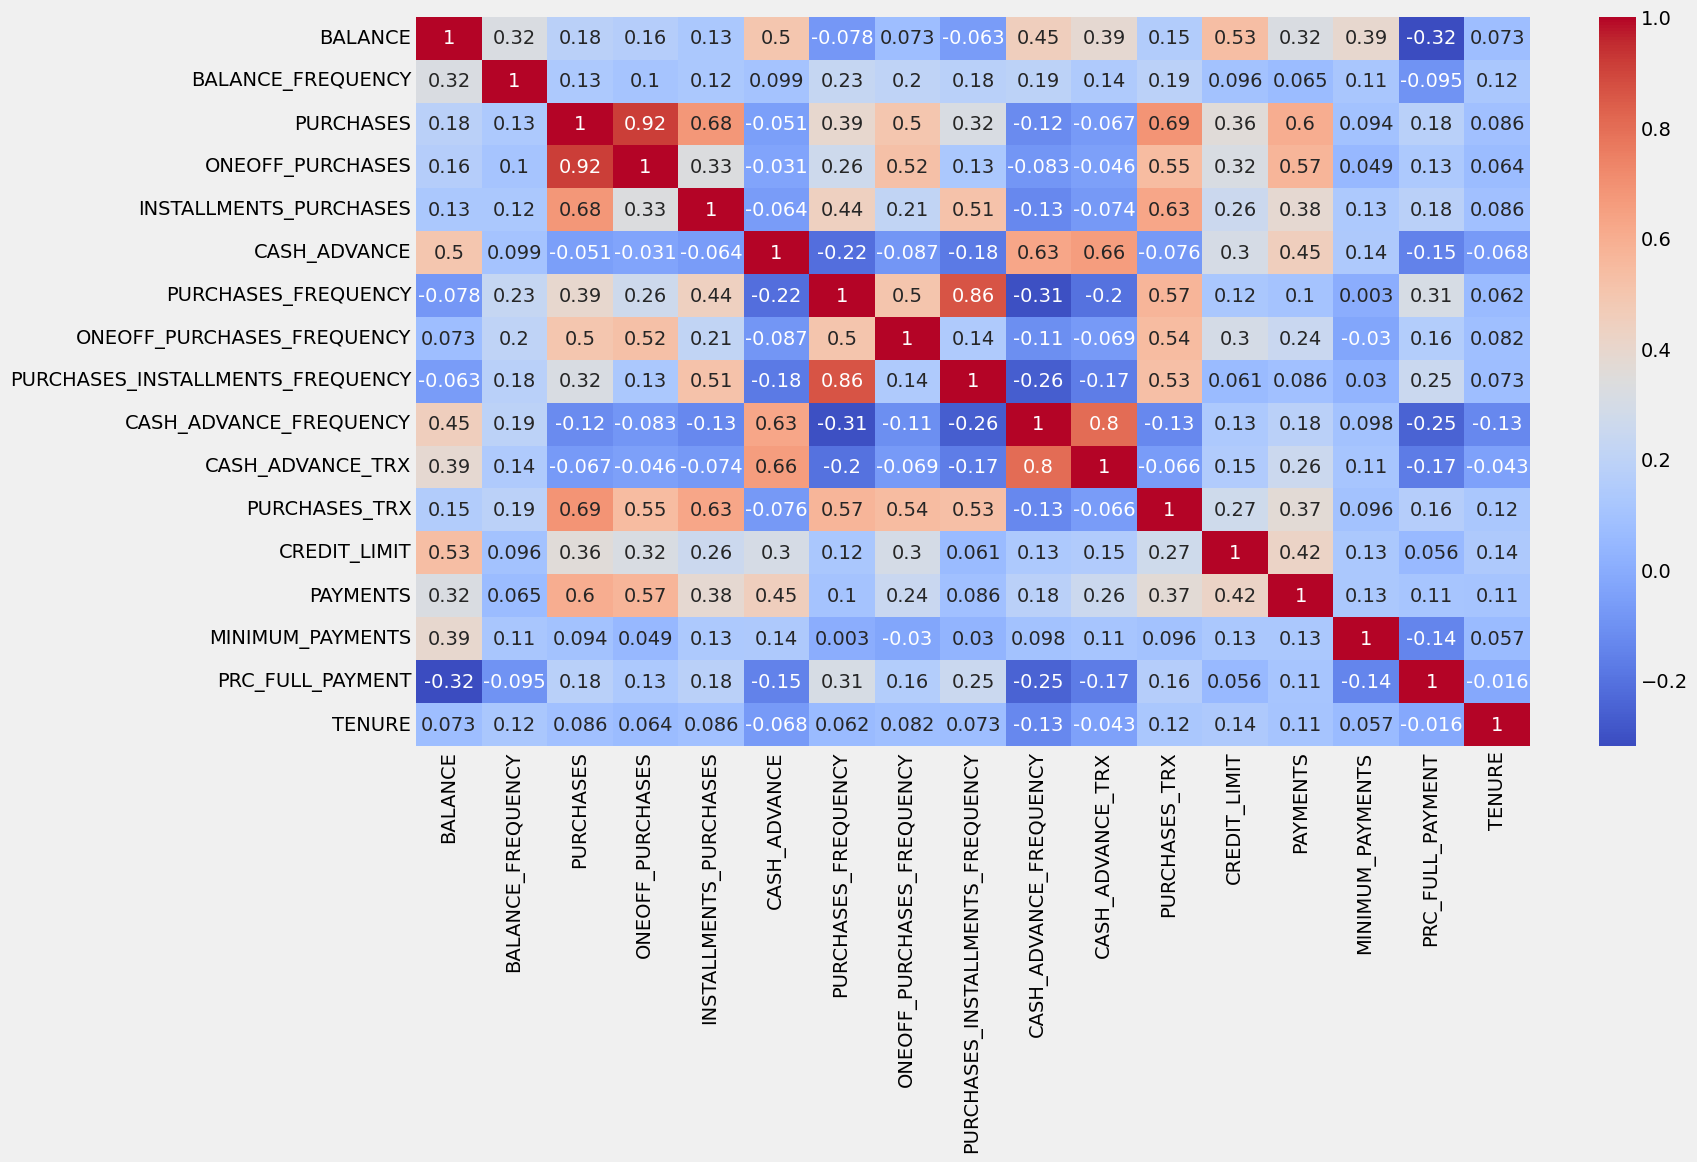

In [41]:
corr = data.corr()

plt.figure(figsize=(16,9))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

## Visualization Section

In [24]:
plt.style.use('fivethirtyeight')

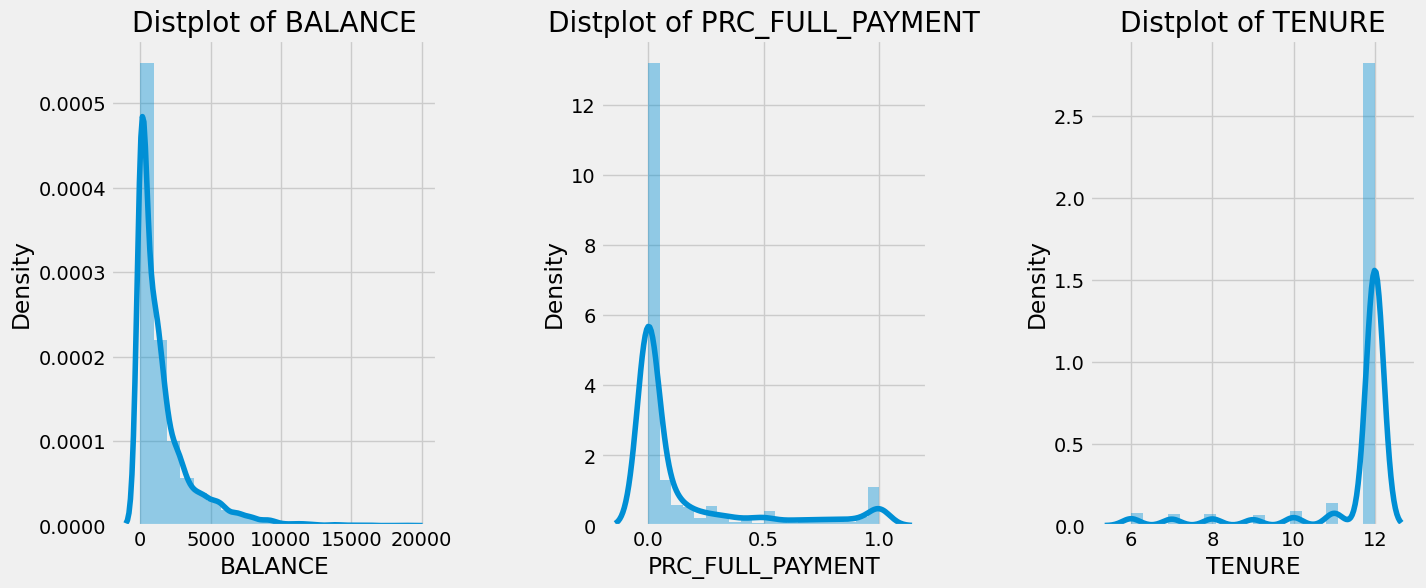

In [42]:
# 	BALANCE_FREQUENCY	PURCHASES	ONEOFF_PURCHASES	INSTALLMENTS_PURCHASES	CASH_ADVANCE	PURCHASES_FREQUENCY	ONEOFF_PURCHASES_FREQUENCY	PURCHASES_INSTALLMENTS_FREQUENCY	CASH_ADVANCE_FREQUENCY
# CASH_ADVANCE_TRX	PURCHASES_TRX	CREDIT_LIMIT	PAYMENTS	MINIMUM_PAYMENTS	PRC_FULL_PAYMENT

plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['BALANCE' , 'PRC_FULL_PAYMENT' , 'TENURE']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Ploting the Relation between BALANCE , PRC_FULL_PAYMENT, and TENURE  

*   List item
*   List item



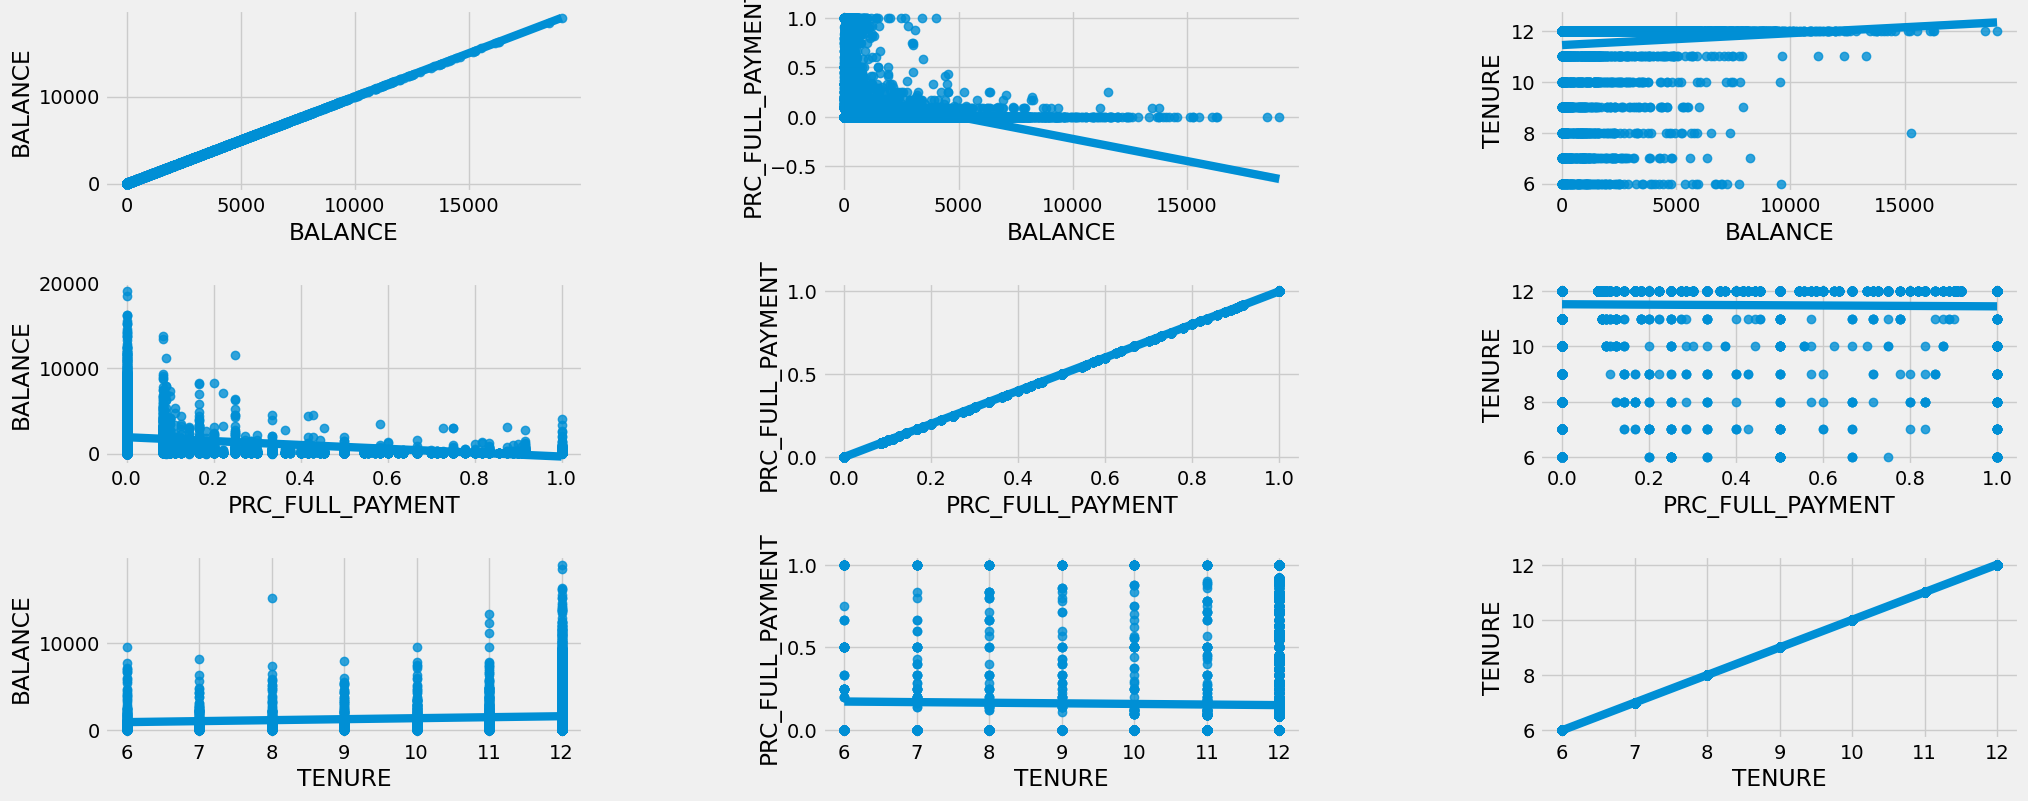

In [49]:
plt.figure(1, figsize = (22 , 9))
n = 0
for x in ['BALANCE', 'PRC_FULL_PAYMENT', 'TENURE']:
    for y in ['BALANCE', 'PRC_FULL_PAYMENT', 'TENURE']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

# Part 2: Elbow Method to find the Optimal number of Clusters

In [61]:
from sklearn.cluster import KMeans



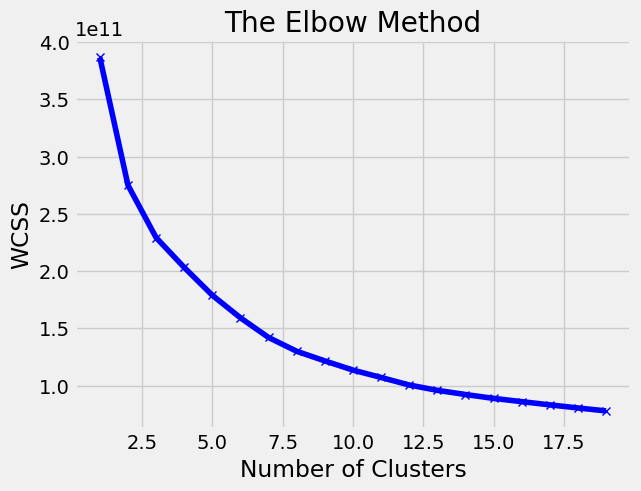

In [70]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

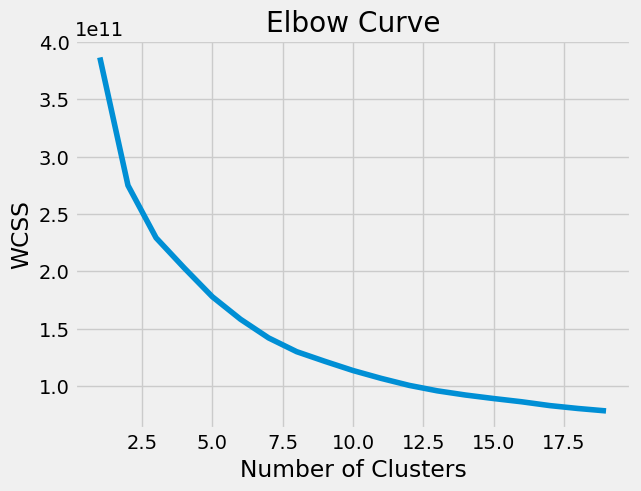

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/47 - CC-GENERAL.csv')

# Preprocess the data
data.dropna(inplace=True)
data = data.drop('CUST_ID', axis=1)  # Exclude non-numeric columns if necessary

# Perform K-Means clustering with different cluster numbers
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 20), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Second Method for KMeans

In [71]:
X1 = data

In [72]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

# Part 3: Top Performance Machine Learning Model
### Random Forest top the list with 9.99, followed by K-Nearest Mean with value of 0.93, RNN with a value of 0.68 and the least is LSTM with a value of 0.44

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
#data = pd.read_csv('47 - CC-GENERAL.csv')
data = pd.read_csv('/content/47 - CC-GENERAL.csv')

# Preprocess the data
data.dropna(inplace=True)
X = data.drop('CUST_ID', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['TENURE'], test_size=0.2, random_state=42)

# K-Nearest Mean
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# RNN
rnn = Sequential()
rnn.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
rnn.add(Dense(16, activation='relu'))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=3)
rnn.fit(X_train, y_train, epochs=10, callbacks=[early_stopping], validation_data=(X_test, y_test))
rnn_pred = rnn.predict(X_test)
rnn_acc = accuracy_score(y_test, rnn_pred.round())

# LSTM
lstm = Sequential()
lstm.add(LSTM(32, activation='relu', input_shape=(1, X_train.shape[1])))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), y_train, epochs=10, callbacks=[early_stopping], validation_data=(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]), y_test))
lstm_pred = lstm.predict(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]))
lstm_acc = accuracy_score(y_test, lstm_pred.round())

# Rank the models based on performance
models = ['K-Nearest Mean', 'Random Forest', 'RNN', 'LSTM']
accuracies = [knn_acc, rf_acc, rnn_acc, lstm_acc]
ranked_models = sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True)

# Print the ranked models
for i, (model, acc) in enumerate(ranked_models):
    print(f'{i+1}. {model}: {acc:.4f}')

Epoch 1/10
216/216 [==============================] - 2s 5ms/step - loss: 62.9850 - val_loss: 5.8049
Epoch 2/10
216/216 [==============================] - 1s 4ms/step - loss: 4.5449 - val_loss: 3.1947
Epoch 3/10
216/216 [==============================] - 1s 3ms/step - loss: 2.8669 - val_loss: 2.2578
Epoch 4/10
216/216 [==============================] - 1s 3ms/step - loss: 2.0439 - val_loss: 1.7450
Epoch 5/10
216/216 [==============================] - 0s 2ms/step - loss: 1.5666 - val_loss: 1.4194
Epoch 6/10
216/216 [==============================] - 1s 3ms/step - loss: 1.2069 - val_loss: 1.1872
Epoch 7/10
216/216 [==============================] - 1s 3ms/step - loss: 0.9363 - val_loss: 0.9577
Epoch 8/10
216/216 [==============================] - 0s 2ms/step - loss: 0.7251 - val_loss: 0.7422
Epoch 9/10
216/216 [==============================] - 1s 3ms/step - loss: 0.5635 - val_loss: 0.6095
Epoch 10/10
54/54 [==============================] - 0s 1ms/step
Epoch 1/10
216/216 [==============